In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
from scipy import stats

In [3]:
bank_csv = pd.read_csv('./data/bank-additional-full.csv',sep=";")
df_bank = pd.DataFrame(bank_csv)

df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


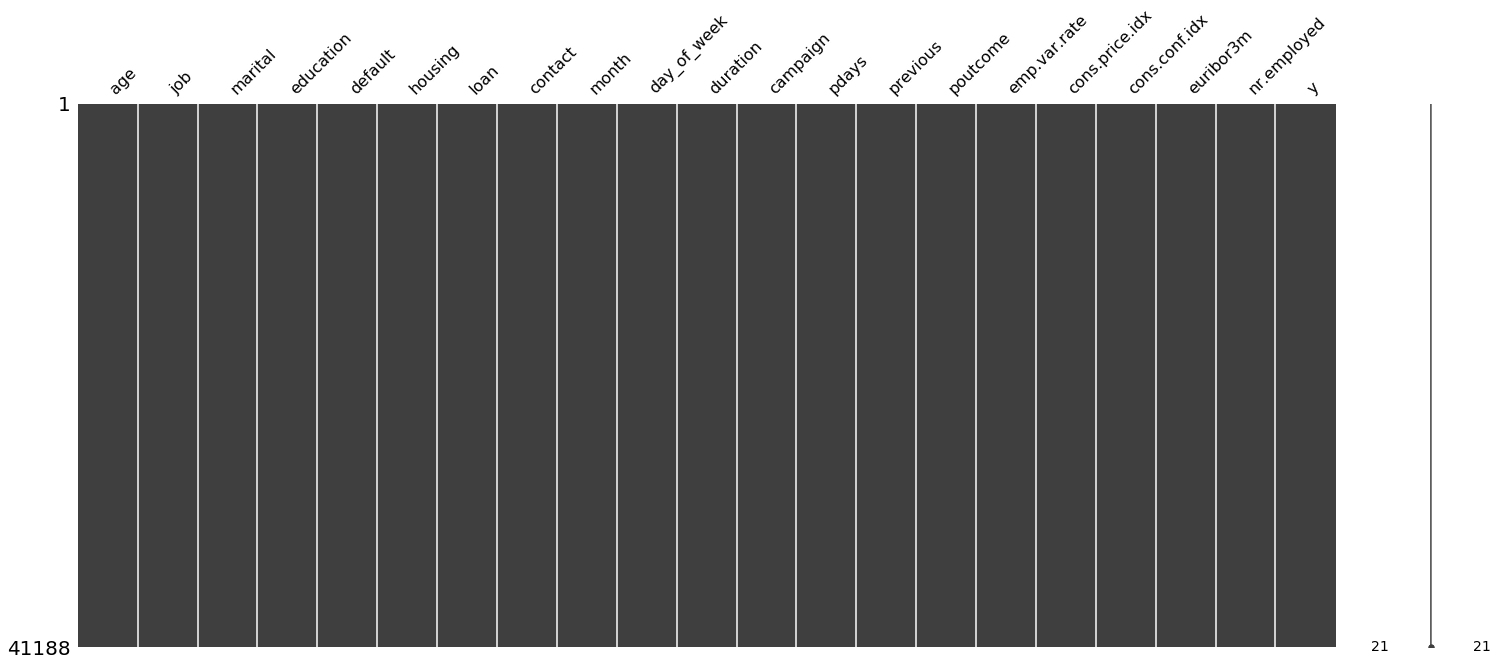

In [6]:
msno.matrix(df_bank);

### Calculate Missing Values

In [5]:
total_values = df_bank.shape[0]
for column in df_bank:
    missing_values = df_bank[column].isna().sum()
    perc = missing_values/total_values * 100
    if missing_values > 0:
        print("The {} column is missing {}, which accounts for {}% of the data".format(column, missing_values, perc.round(2)))

No missing values! Very good 

In [42]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [ ]:
# age is fine 
# duration?? --> remove
# campaign?? --> include (# of contact performed during this campaign)
# pdays?? --> consider transform into contacted_within_1yr (1) or last_contacted_more_than_1yr (0)
# previous --> number of contacts for previous campaigns


# emp.var.rate -->  these three datasets are monthly index, which means very collinear with month. 
# cons.price.idx --> We can just leave this in, and see if lasso removes these features 
# euribor3m -->
# nr.employed --> remove

# duration: last contact duration, in seconds (numeric). 
# Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous: number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# # social and economic context attributes
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed: number of employees - quarterly indicator (numeric)

In [9]:
df_bank.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

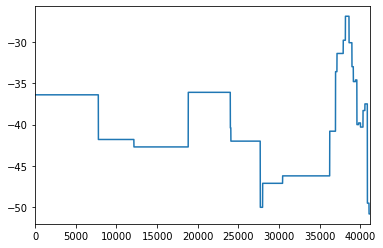

In [27]:
df_bank['cons.conf.idx'].plot()

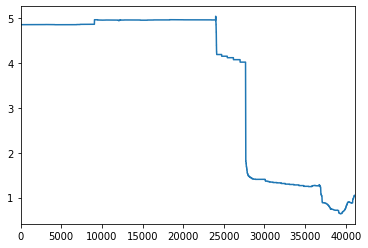

In [26]:
df_bank.euribor3m.plot()

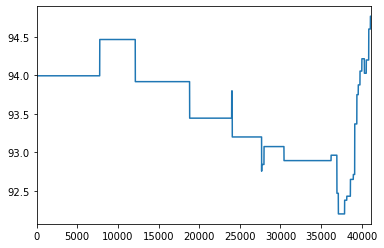

In [28]:
df_bank['cons.price.idx'].plot();

We have 88.73% No and 11.27% yes


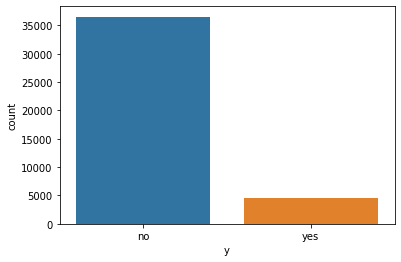

In [41]:
sns.countplot(x='y',data=df_bank);
y_counts = df_bank.y.value_counts()
total = len(df_bank)
y_counts
print(f"We have {round(y_counts[0]*100/total,2)}% No and {round(y_counts[1]*100/total,2)}% yes")